In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2

In [2]:
# dir = '../input/animals10/raw-img'
directory = '../datasets/raw-img'

In [3]:
classes = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

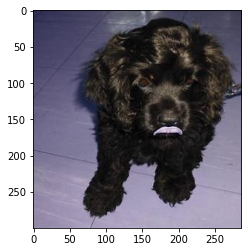

In [4]:
for cl in classes:
    path = os.path.join(directory, cl)
    for im_path in os.listdir(path):
        img = cv2.imread(os.path.join(path, im_path))
        plt.imshow(img)
        break
    break

In [5]:
img.shape

(300, 287, 3)

In [6]:
dataset = []
for cl in classes:
    cls_num = classes.index(cl)
    path = os.path.join(directory, cl)
    for img in os.listdir(path):
        try:
            img = cv2.imread(os.path.join(path, img))
            resized_img = cv2.resize(img, (224, 224))
            dataset.append([resized_img, cls_num])
        except Exception as e:
            pass

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

In [7]:
len(dataset)

26179

In [8]:
random.shuffle(dataset)
for i in dataset[:10]:
    print(classes[i[1]])

elefante
cane
ragno
ragno
ragno
farfalla
cavallo
farfalla
ragno
pecora


In [9]:
x = []
y = []
for pic, label in dataset:
    x.append(pic)
    y.append(label)

In [10]:
x = np.array(x)

In [11]:
y = np.array(y)

In [12]:
print(type(x), x.shape)
print(type(y), y.shape)

<class 'numpy.ndarray'> (26179, 224, 224, 3)
<class 'numpy.ndarray'> (26179,)


In [13]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(20943, 224, 224, 3) (5236, 224, 224, 3) (20943,) (5236,)


In [16]:
translate = ["dog", "horse", "elephant", "butterfly", "chicken", "cat", "cow", "sheep", "spider", "squirrel"]

In [17]:
def img_show(pic, label, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(pic[index])
    plt.xlabel(translate[label[index]], fontsize=10)

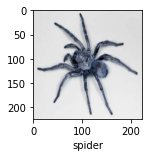

In [18]:
img_show(x_test, y_test, 8)

In [19]:
IMAGE_SHAPE = [224, 224]

In [20]:
vgg = VGG16(input_shape=IMAGE_SHAPE + [3], weights='imagenet', include_top=False)

2022-08-26 20:52:45.940003: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
for layer in vgg.layers:
    layer.trainable = False

In [22]:
x = Flatten()(vgg.output)
predictions = Dense(10, activation='softmax')(x)

In [23]:
model = Model(inputs=vgg.input, outputs=predictions)

In [24]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [26]:
model.fit(x_train, y_train, epochs=4, batch_size=32)

Epoch 1/4
655/655 [==============================] - 2519s 4s/step - loss: 6.9975 - accuracy: 0.8830
Epoch 2/4
655/655 [==============================] - 2017s 3s/step - loss: 2.5655 - accuracy: 0.9606
Epoch 3/4
655/655 [==============================] - 2411s 4s/step - loss: 1.6239 - accuracy: 0.9715
Epoch 4/4
655/655 [==============================] - 2276s 3s/step - loss: 1.1826 - accuracy: 0.9807


In [28]:
model.save('animals_vgc16p260822.hdf5')

In [29]:
from keras_preprocessing.image import load_img, img_to_array

1/1 [==============================] - 0s 215ms/step


'butterfly'

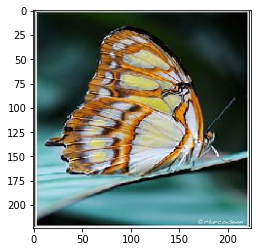

In [30]:
img1 = load_img('../datasets/raw-img/farfalla/OIP--4zW12JF-JpwKcDtEK7thgHaLC.jpeg', target_size=(224, 224))
plt.imshow(img1)
img1 = img_to_array(img1)
img1 = np.expand_dims(img1, axis=0)
result_b = model.predict(img1)
translate[np.argmax(result_b[0])]

1/1 [==============================] - 0s 96ms/step


'cat'

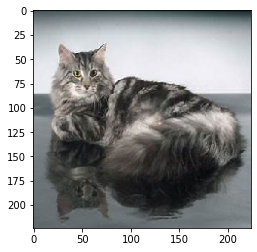

In [31]:
img2 = load_img('../datasets/tests/1615.jpeg', target_size=(224, 224))
plt.imshow(img2)
img2 = img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
result_b1 = model.predict(img2)
translate[np.argmax(result_b1[0])]

In [36]:
def load_and_predict(url):
    test_img = load_img(url, target_size=(224, 224))
    plt.imshow(test_img)
    test_img = img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    result_d = model.predict(test_img)
    return translate[np.argmax(result_d[0])]

1/1 [==============================] - 0s 92ms/step


'elephant'

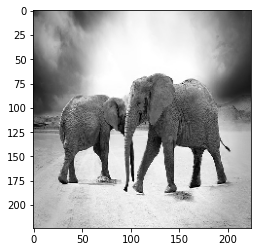

In [37]:
test_img2 = load_and_predict('../datasets/tests/e03.jpg')
test_img2

1/1 [==============================] - 0s 89ms/step


'chicken'

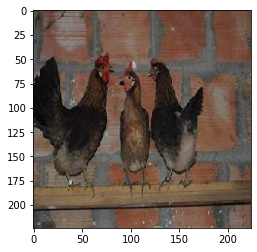

In [38]:
test_img3 = load_and_predict('../datasets/tests/w04.jpeg')
test_img3

1/1 [==============================] - 0s 89ms/step


'spider'

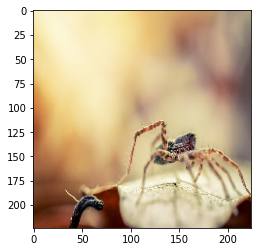

In [40]:
test_img4 = load_and_predict('../datasets/tests/e83c.jpg')
test_img4